<a href="https://colab.research.google.com/github/Heoyuna0819/deeplearning/blob/main/1pytorch_diabetes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


file_path = "/content/drive/MyDrive/diabetes.csv"
df = pd.read_csv(file_path)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# 데이터와 타겟 분리
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values


In [6]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((614, 8), (154, 8), (614,), (154,))

In [7]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1,1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1,1)


In [8]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([614, 8]),
 torch.Size([154, 8]),
 torch.Size([614, 1]),
 torch.Size([154, 1]))

In [10]:
#모델정의
class Diabetes_Dense(nn.Module):
    def __init__(self):
        super(Diabetes_Dense, self).__init__()
        self.fc1 = nn.Linear(8, 64) # 입력층 : 특성의 개수 8개
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # 출력층 : 이진분류의 출력 뉴런 수는 1

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x)) # 이진 분류에서 출력층의 활성화 함수는 sigmoid. 만약 BCEWithLogitLoss()를 loss function으로 쓰면 sigmoid 지정 안해도 됨.
        return x

# Initialize the model, loss function, and optimizer
model = Diabetes_Dense() # 모델 생성
criterion = nn.BCELoss() # 손실 함수. 이진분류이므로 BCELoss() 사용.
optimizer = optim.Adam(model.parameters(), lr=0.001) # 옵티마이저는 Adam을 사용

In [11]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [12]:

# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        labels = labels.view(-1, 1)
        # Zero the parameter gradients
        optimizer.zero_grad()


        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, labels)  # Ensure outputs is squeezed to match labels

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            labels = labels.view(-1, 1)
            outputs = model(inputs)
            predicted = (outputs> 0.5).float()  # 0.5 threshold for binary classification

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 0.7899, Accuracy: 70.78%
Epoch 2/20, Loss: 0.7929, Accuracy: 70.78%
Epoch 3/20, Loss: 0.7832, Accuracy: 71.43%
Epoch 4/20, Loss: 0.7926, Accuracy: 72.08%
Epoch 5/20, Loss: 0.7829, Accuracy: 72.08%
Epoch 6/20, Loss: 0.7860, Accuracy: 72.08%
Epoch 7/20, Loss: 0.7891, Accuracy: 72.08%
Epoch 8/20, Loss: 0.7954, Accuracy: 72.73%
Epoch 9/20, Loss: 0.7852, Accuracy: 72.08%
Epoch 10/20, Loss: 0.7853, Accuracy: 72.73%
Epoch 11/20, Loss: 0.7917, Accuracy: 72.73%
Epoch 12/20, Loss: 0.7916, Accuracy: 72.73%
Epoch 13/20, Loss: 0.7850, Accuracy: 72.73%
Epoch 14/20, Loss: 0.7880, Accuracy: 72.08%
Epoch 15/20, Loss: 0.7815, Accuracy: 72.08%
Epoch 16/20, Loss: 0.7943, Accuracy: 71.43%
Epoch 17/20, Loss: 0.7844, Accuracy: 71.43%
Epoch 18/20, Loss: 0.7874, Accuracy: 71.43%
Epoch 19/20, Loss: 0.7840, Accuracy: 71.43%
Epoch 20/20, Loss: 0.7905, Accuracy: 71.43%
Training complete.


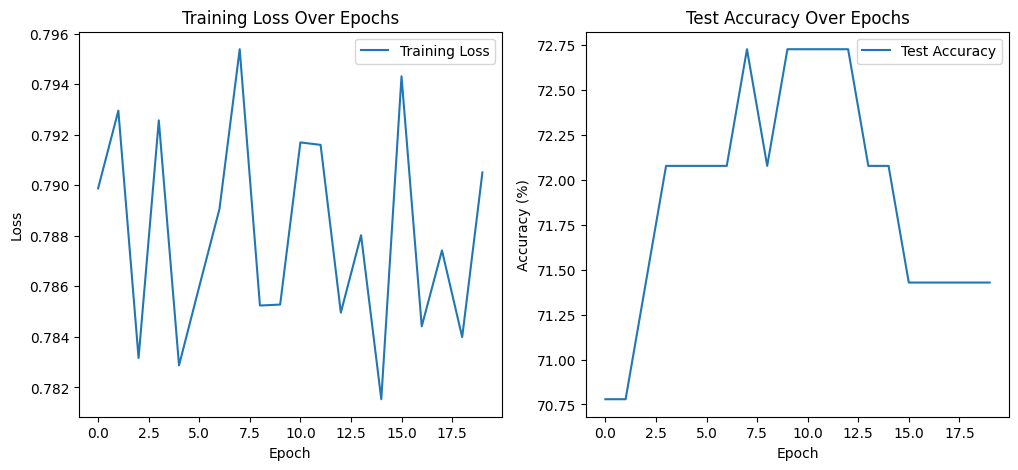

In [13]:
# Evaluation
model.eval() # 평가 모드
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs) # 예측
        predicted = (outputs >= 0.5).float()
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# numpy 변환
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# 실제 값과 예측 값을 매치하여 혼동 행렬, f1-score, precision, recall을 계산.
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# 각 클래스에 대한 특이도(specificity) 계산
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))



# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# 학습이 진행됨에 따라 변화하는 loss 값을 시각화
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# 학습이 진행됨에 따라 변화하는 accuracy 값을 시각화
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()